# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [36]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
data = pd.read_csv('data/spam_or_not_spam.csv')
data.tail()

,email,label
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1
2999,hello this is chinese traditional 子 件 NUMBER世...,1


In [2]:
# рассчитайте частоты для классов : 
data.groupby('label').count()

,email
label,
0,2500
1,499


<AxesSubplot:xlabel='label', ylabel='count'>

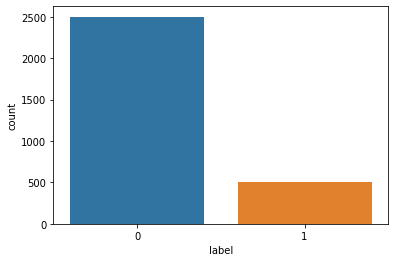

In [3]:
# визуализируйте результат: 
import seaborn as sns
sns.countplot(data=data, x='label')

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

Замените все пустоты (пустые строки) в данных на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [6]:
data = data.dropna(how='any', axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   2999 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 70.3+ KB


Переводим данные в векторный вид:

In [7]:
vectorizer = CountVectorizer()
dt = vectorizer.fit_transform(data["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [8]:
dt.shape

(2999, 34116)

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [25]:
#ваш код здесь
X = data.drop('label', axis=1)
y = data['label']

Разделите выборку на обучающую и тестовую, размер тестовой выборки возьмите как 0.25, параметр random_state определите со значением 42:

In [26]:
from sklearn import model_selection
X_train, X_test, y_train, y_test= model_selection.train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [27]:
#ваш код здесь
y_test.mean()

0.16666666666666666

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [35]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 0.01)
clf.fit(X, y)
MultinomialNB()
print(clf.predict(X[2998:2999]))

[1]


Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

Нарисуйте ROC-кривую:

In [ ]:
#ваш код здесь

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [ ]:
#ваш код здесь